In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


algorithm = 'ComplementNB'
algo_short = "cnb"
acc = '76'
dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

algorithms = [
    'MultinomialNB', 
    'ComplementNB',
    'xgb',
    'rfc',
    'LogisticRegression',
    'LinearSVC',
    'VotingClassifier',
    ]
algos_short = [
    'mnb', 
    'cnb',
    'xgb',
    'rfc',
    'lrg',
    'lsvc',
    'vth',
    ]
accs = [
    '77',
    '76',
    '76',
    '72',
    '78',
    '76',
    '77'
    ]

vaccines = ["biontech", "janssen", "moderna",
            "oxford", "sinopharm", "sinovac", "sputnik"]


# n_grams = [(1, 1), (1, 2)]
# n_grams = [(1, 1)]
n_grams = [(1, 2)]
years = ["2020", "2021", "2022"]
months = ["january", "february", "march", "april", "may", "june",
          "july", "august", "september", "october", "november", "december"]
war = []

for file in os.listdir("../data/"):
    war.append(file)

## MONTHS

# for n_gram in n_grams:
#     for year in years:
#         for month in months:
#             vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

#             model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"

#             # already processed
#             try:
#                 df = pd.read_csv(f'../{year}-data/covid-{month}.csv', delimiter=',')
#             except Exception:
#                 continue

#             df = df.drop_duplicates()

#             df = df[['tweet', 'sentiment']]

#             tfidf = joblib.load(vectorizer_path)

#             model = joblib.load(model_path)

#             X = df.iloc[:, 0].fillna(' ')

#             tweets = X

#             num_of_tweets_analyzed = len(tweets)

#             y_pred = tfidf.transform(X)

#             predictions = model.predict(y_pred)

#             # saving tweets to csv
#             tweets.to_csv(f'../analysis/tweets-{month}-{year}-{n_gram}.csv')
#             # saving sentiment predictions to csv
#             np.savetxt(f'../analysis/predictions-{month}-{year}-{n_gram}.csv',
#                     predictions, delimiter=',', fmt=('%s'))

#             # adding sentiment column to the beginning
#             df = pd.read_csv(
#                 f'../analysis/predictions-{month}-{year}-{n_gram}.csv', header=None)
#             df.rename(columns={0: 'sentiment'}, inplace=True)
#             # save to new csv file
#             df.to_csv(
#                 f'../analysis/predictions-{month}-{year}-{n_gram}.csv', index=False)

#             # merging tweets and predictions
#             filenames = [f'../analysis/tweets-{month}-{year}-{n_gram}.csv',
#                          f'../analysis/predictions-{month}-{year}-{n_gram}.csv']
#             dfs = []
#             for filename in filenames:
#                 # read the csv, making sure the first two columns are str
#                 df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
#                 # change the column names so they won't collide during concatenation
#                 df.columns = [filename + str(cname) for cname in df.columns]
#                 dfs.append(df)

#             # concatenate them horizontally
#             merged = pd.concat(dfs, axis=1)
#             # write it out
#             merged.to_csv(
#                 f"../analysis/merged-{month}-{year}-{n_gram}.csv", header=None, index=None)

#             df = pd.read_csv(f'../analysis/merged-{month}-{year}-{n_gram}.csv')

#             labels = ['negative', 'positive']

#             title_type = df.groupby('sentiment').agg('count')

#             type_labels = ['positive', 'negative']
#             type_counts = title_type.tweet.sort_values()

#             colors = ['g', 'r']

#             plt.subplot(
#                 aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
#             type_show_ids = plt.pie(type_counts, labels=type_labels,
#                                     autopct='%1.1f%%', shadow=True, colors=colors)
#             plt.savefig(f"../visuals/{algo_short}/{month}-{year}-{n_gram}.png")
#             plt.show()




In [ ]:

## WAR!
for al_long, al_short, acc1 in zip(algorithms, algos_short, accs):  
    for n_gram in n_grams:
        vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}_1.pkl"
        model_path = f"../models/{al_long}_{dataset_dir}_{acc1}_{n_gram}.pkl"
        tfidf = joblib.load(vectorizer_path)
        model = joblib.load(model_path)
        accs0 = []
        for lang in war:
                print(lang)
                # already processed
                df = pd.read_csv(f'../data/{lang}', delimiter=',')

                df = df.drop_duplicates()

                df = df[['tweet', "translate", 'sentiment']]
                
                if not lang == 'war.csv' and not lang == 'war2.csv':
                    df['tweet'] = df['translate']

                print(df.head())
                X = df.iloc[:, 0].fillna(' ')

                tweets = X

                num_of_tweets_analyzed = len(tweets)

                y_pred = tfidf.transform(X)

                predictions = model.predict(y_pred)
                print(np.count_nonzero(predictions == 1), np.count_nonzero(predictions == 0))
                
                # saving tweets to csv
                tweets.to_csv(f'../analysis/tweets-{lang}.csv')
                # saving sentiment predictions to csv
                np.savetxt(f'../analysis/predictions-{lang}.csv',
                        predictions, delimiter=',', fmt=('%s'))

                # adding sentiment column to the beginning
                df = pd.read_csv(
                    f'../analysis/predictions-{lang}.csv', header=None)
                df.rename(columns={0: 'sentiment'}, inplace=True)
                # save to new csv file
                df.to_csv(
                    f'../analysis/predictions-{lang}.csv', index=False)

                # merging tweets and predictions
                filenames = [f'../analysis/tweets-{lang}.csv',
                            f'../analysis/predictions-{lang}.csv']
                dfs = []
                for filename in filenames:
                    # read the csv, making sure the first two columns are str
                    df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
                    # change the column names so they won't collide during concatenation
                    df.columns = [filename + str(cname) for cname in df.columns]
                    dfs.append(df)

                # concatenate them horizontally
                merged = pd.concat(dfs, axis=1)
                # write it out
                merged.to_csv(
                    f"../analysis/merged-{lang}.csv", header=None, index=None)

                df = pd.read_csv(f'../analysis/merged-{lang}.csv')


                title_type = df.groupby('sentiment').agg('count')

                type_labels = ['positive', 'negative']
                type_counts = title_type.tweet.sort_values()
                accs0.append(type_counts)


    accs = np.array(accs0)
    f2 = lambda x: [round(x[0]/(x[0]+x[1])*100, 2), round(x[1]/(x[0]+x[1])*100, 2)]
    accs = [f2(x) for x in accs]
    accs
    # counts = [x[0]+x[1] for x in accs0]
    # counts
    langs = ["french", "german", "italian", "norwegian", "polish", "russian", "spanish", "english"]
    # plt.bar(langs, counts)
    # plt.show()
        
    from cycler import cycler

    plt.figure()
    fig, ax = plt.subplots()
    plt.xticks(rotation=90)
    print(accs)
    plt.rc('axes', prop_cycle=(cycler('color', ['g', 'r'])))
    ax.plot(langs, accs, ls='-', marker='o', label=['Positive', 'Negative'])  

    plt.xlabel("Language")
    plt.ylabel("Percentage")
    plt.title(f"Positive and Negative Sentiment Across Languages with {al_long}")
    ax.legend()
    plt.savefig(f"../visuals/yayin/{al_short}/war.png")
    plt.show()

# for n_gram in n_grams:
#     for vaccine in vaccines:
#         vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

#         model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"

#         # already processed
#         try:
#             df = pd.read_csv(f'../vaccines/{vaccine}.csv', delimiter=',')
#         except Exception as e:
#             print(e)
#             continue
#         print(df.head())
#         df = df.drop_duplicates()

#         df = df[['tweet', 'sentiment']]

#         tfidf = joblib.load(vectorizer_path)

#         model = joblib.load(model_path)

#         X = df.iloc[:, 0].fillna(' ')

#         tweets = X

#         num_of_tweets_analyzed = len(tweets)

#         y_pred = tfidf.transform(X)

#         predictions = model.predict(y_pred)

#         # saving tweets to csv
#         tweets.to_csv(f'../analysis/tweets-{vaccine}-{n_gram}.csv')
#         # saving sentiment predictions to csv
#         np.savetxt(f'../analysis/predictions-{vaccine}-{n_gram}.csv',
#                 predictions, delimiter=',', fmt=('%s'))

#         # adding sentiment column to the beginning
#         df = pd.read_csv(
#             f'../analysis/predictions-{vaccine}-{n_gram}.csv', header=None)
#         df.rename(columns={0: 'sentiment'}, inplace=True)
#         # save to new csv file
#         df.to_csv(
#             f'../analysis/predictions-{vaccine}-{n_gram}.csv', index=False)

#         # merging tweets and predictions
#         filenames = [f'../analysis/tweets-{vaccine}-{n_gram}.csv',
#                         f'../analysis/predictions-{vaccine}-{n_gram}.csv']
#         dfs = []
#         for filename in filenames:
#             # read the csv, making sure the first two columns are str
#             df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
#             # change the column names so they won't collide during concatenation
#             df.columns = [filename + str(cname) for cname in df.columns]
#             dfs.append(df)

#         # concatenate them horizontally
#         merged = pd.concat(dfs, axis=1)
#         # write it out
#         merged.to_csv(
#             f"../analysis/merged-{vaccine}-{n_gram}.csv", header=None, index=None)

#         df = pd.read_csv(f'../analysis/merged-{vaccine}-{n_gram}.csv')

#         labels = ['negative', 'positive']

#         title_type = df.groupby('sentiment').agg('count')

#         type_labels = ['positive', 'negative']
#         type_counts = title_type.tweet.sort_values()

#         colors = ['g', 'r']

#         plt.subplot(
#             aspect=1, title=f'Percentage of tweets pro or against vaccination in {vaccine}\nClassified {num_of_tweets_analyzed} tweets.')
#         type_show_ids = plt.pie(type_counts, labels=type_labels,
#                                 autopct='%1.1f%%', shadow=True, colors=colors)
#         plt.savefig(f"../visuals/{algo_short}/{vaccine}-{n_gram}.png")
#         plt.show()



In [8]:
print(accs0, langs)

[sentiment
0    42
1    67
Name: tweet, dtype: int64, sentiment
0     560
1    1114
Name: tweet, dtype: int64, sentiment
0     35
1    135
Name: tweet, dtype: int64, sentiment
0     98
1    165
Name: tweet, dtype: int64, sentiment
0     37
1    115
Name: tweet, dtype: int64, sentiment
0    353
1    388
Name: tweet, dtype: int64, sentiment
0    711
1    761
Name: tweet, dtype: int64, sentiment
0    4017
1    9297
Name: tweet, dtype: int64] ['french', 'german', 'italian', 'norwegian', 'polish', 'russian', 'spanish', 'english']


                                               tweet  \
0  biden turn venezuela obtain oil russian presid...   
1  believ ukrain carri nato war putin russia prox...   
2  direct war ukrain eu increas militari aid puti...   
3  februari 24 vladimir putin launch war ukrain d...   
4  precis western want push russia offici war dec...   

                                           translate  sentiment  
0  biden turn venezuela obtain oil russian presid...          2  
1  believ ukrain carri nato war putin russia prox...          2  
2  direct war ukrain eu increas militari aid puti...          2  
3  februari 24 vladimir putin launch war ukrain d...          2  
4  precis western want push russia offici war dec...          2  
67 42
                                               tweet  \
0  83 rus un ulyanov eu midru ukrain natoputin lo...   
1  error mark yellowvoelkerrecht unckrain ukraine...   
2  tom999 presseclub dont think presseclub fact b...   
3  e februari 24 2022 russia began la

<Figure size 432x288 with 0 Axes>

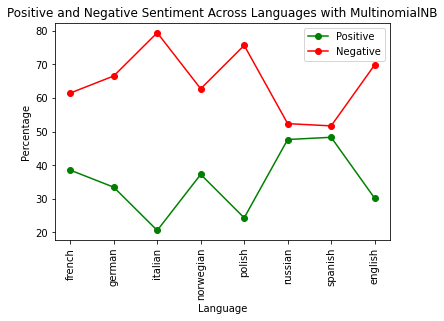

In [9]:
vectorizer_path = f"../vectors/vectorizer_sentiment140_(1, 2)_1.pkl"
model_path = f"../models/MultinomialNB_sentiment140_77_(1, 2).pkl"
tfidf = joblib.load(vectorizer_path)
model = joblib.load(model_path)
accs0 = []
for lang in war:
    df = pd.read_csv(f'../data/{lang}', delimiter=',')

    df = df.drop_duplicates()

    df = df[['tweet', "translate", 'sentiment']]

    if not lang == 'war.csv' and not lang == 'war2.csv':
        df['tweet'] = df['translate']

    print(df.head())
    X = df.iloc[:, 0].fillna(' ')

    tweets = X

    num_of_tweets_analyzed = len(tweets)

    y_pred = tfidf.transform(X)

    predictions = model.predict(y_pred)
    print(np.count_nonzero(predictions == 1), np.count_nonzero(predictions == 0))

    # saving tweets to csv
    tweets.to_csv(f'../analysis/tweets-{lang}.csv')
    # saving sentiment predictions to csv
    np.savetxt(f'../analysis/predictions-{lang}.csv',
            predictions, delimiter=',', fmt=('%s'))

    # adding sentiment column to the beginning
    df = pd.read_csv(
        f'../analysis/predictions-{lang}.csv', header=None)
    df.rename(columns={0: 'sentiment'}, inplace=True)
    # save to new csv file
    df.to_csv(
        f'../analysis/predictions-{lang}.csv', index=False)

    # merging tweets and predictions
    filenames = [f'../analysis/tweets-{lang}.csv',
                f'../analysis/predictions-{lang}.csv']
    dfs = []
    for filename in filenames:
        # read the csv, making sure the first two columns are str
        df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
        # change the column names so they won't collide during concatenation
        df.columns = [filename + str(cname) for cname in df.columns]
        dfs.append(df)

    # concatenate them horizontally
    merged = pd.concat(dfs, axis=1)
    # write it out
    merged.to_csv(
        f"../analysis/merged-{lang}.csv", header=None, index=None)

    df = pd.read_csv(f'../analysis/merged-{lang}.csv')


    title_type = df.groupby('sentiment').agg('count')

    type_labels = ['positive', 'negative']
    type_counts = title_type.tweet.sort_values()
    accs0.append(type_counts)
accs = np.array(accs0)
f2 = lambda x: [round(x[0]/(x[0]+x[1])*100, 2), round(x[1]/(x[0]+x[1])*100, 2)]
accs = [f2(x) for x in accs]
accs
# counts = [x[0]+x[1] for x in accs0]
# counts
langs = ["french", "german", "italian", "norwegian", "polish", "russian", "spanish", "english"]
# plt.bar(langs, counts)
# plt.show()
    
from cycler import cycler

plt.figure()
fig, ax = plt.subplots()
plt.xticks(rotation=90)
print(accs)
plt.rc('axes', prop_cycle=(cycler('color', ['g', 'r'])))
ax.plot(langs, accs, ls='-', marker='o', label=['Positive', 'Negative'])  

plt.xlabel("Language")
plt.ylabel("Percentage")
plt.title(f"Positive and Negative Sentiment Across Languages with MultinomialNB")
ax.legend()
plt.savefig(f"../visuals/yayin/war.png")
plt.show()

                                               tweet  \
0  biden turn venezuela obtain oil russian presid...   
1  believ ukrain carri nato war putin russia prox...   
2  direct war ukrain eu increas militari aid puti...   
3  februari 24 vladimir putin launch war ukrain d...   
4  precis western want push russia offici war dec...   

                                           translate  sentiment  
0  biden turn venezuela obtain oil russian presid...          2  
1  believ ukrain carri nato war putin russia prox...          2  
2  direct war ukrain eu increas militari aid puti...          2  
3  februari 24 vladimir putin launch war ukrain d...          2  
4  precis western want push russia offici war dec...          2  
67 42
                                               tweet  \
0  83 rus un ulyanov eu midru ukrain natoputin lo...   
1  error mark yellowvoelkerrecht unckrain ukraine...   
2  tom999 presseclub dont think presseclub fact b...   
3  e februari 24 2022 russia began la

<Figure size 432x288 with 0 Axes>

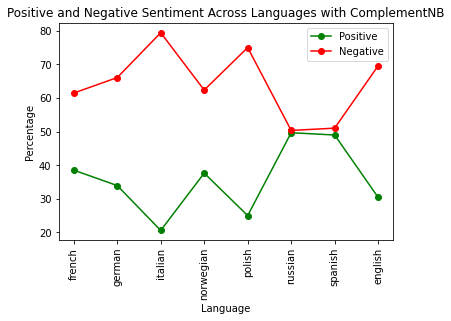

In [10]:
vectorizer_path = f"../vectors/vectorizer_sentiment140_(1, 2)_1.pkl"
model_path = f"../models/ComplementNB_sentiment140_76_(1, 2).pkl"
tfidf = joblib.load(vectorizer_path)
model = joblib.load(model_path)
accs0 = []
for lang in war:
    df = pd.read_csv(f'../data/{lang}', delimiter=',')

    df = df.drop_duplicates()

    df = df[['tweet', "translate", 'sentiment']]

    if not lang == 'war.csv' and not lang == 'war2.csv':
        df['tweet'] = df['translate']

    print(df.head())
    X = df.iloc[:, 0].fillna(' ')

    tweets = X

    num_of_tweets_analyzed = len(tweets)

    y_pred = tfidf.transform(X)

    predictions = model.predict(y_pred)
    print(np.count_nonzero(predictions == 1), np.count_nonzero(predictions == 0))

    # saving tweets to csv
    tweets.to_csv(f'../analysis/tweets-{lang}.csv')
    # saving sentiment predictions to csv
    np.savetxt(f'../analysis/predictions-{lang}.csv',
            predictions, delimiter=',', fmt=('%s'))

    # adding sentiment column to the beginning
    df = pd.read_csv(
        f'../analysis/predictions-{lang}.csv', header=None)
    df.rename(columns={0: 'sentiment'}, inplace=True)
    # save to new csv file
    df.to_csv(
        f'../analysis/predictions-{lang}.csv', index=False)

    # merging tweets and predictions
    filenames = [f'../analysis/tweets-{lang}.csv',
                f'../analysis/predictions-{lang}.csv']
    dfs = []
    for filename in filenames:
        # read the csv, making sure the first two columns are str
        df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
        # change the column names so they won't collide during concatenation
        df.columns = [filename + str(cname) for cname in df.columns]
        dfs.append(df)

    # concatenate them horizontally
    merged = pd.concat(dfs, axis=1)
    # write it out
    merged.to_csv(
        f"../analysis/merged-{lang}.csv", header=None, index=None)

    df = pd.read_csv(f'../analysis/merged-{lang}.csv')


    title_type = df.groupby('sentiment').agg('count')

    type_labels = ['positive', 'negative']
    type_counts = title_type.tweet.sort_values()
    accs0.append(type_counts)
accs = np.array(accs0)
f2 = lambda x: [round(x[0]/(x[0]+x[1])*100, 2), round(x[1]/(x[0]+x[1])*100, 2)]
accs = [f2(x) for x in accs]
accs
# counts = [x[0]+x[1] for x in accs0]
# counts
langs = ["french", "german", "italian", "norwegian", "polish", "russian", "spanish", "english"]
# plt.bar(langs, counts)
# plt.show()
    
from cycler import cycler

plt.figure()
fig, ax = plt.subplots()
plt.xticks(rotation=90)
print(accs)
plt.rc('axes', prop_cycle=(cycler('color', ['g', 'r'])))
ax.plot(langs, accs, ls='-', marker='o', label=['Positive', 'Negative'])  

plt.xlabel("Language")
plt.ylabel("Percentage")
plt.title(f"Positive and Negative Sentiment Across Languages with ComplementNB")
ax.legend()
plt.savefig(f"../visuals/yayin/war.png")
plt.show()